In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import  metrics

from sklearn.preprocessing import  StandardScaler

from xgboost import XGBRegressor
from sklearn.linear_model import  LinearRegression
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import  train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import warnings
warnings.filterwarnings("ignore")

In [60]:
train = pd.read_csv("Housing_dataset_train.csv")
test = pd.read_csv("Housing_dataset_test.csv")
submission = pd.read_csv("Sample_submission.csv")

In [61]:
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [62]:
train.tail()

,ID,loc,title,bedroom,bathroom,parking_space,price
13995,6175,Edo,Bungalow,NaN,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,NaN,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,NaN,6.0,1.0,3348918.718
13999,8787,Nasarawa,NaN,9.0,7.0,5.0,2858516.890


In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [64]:
train.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [65]:
train.nunique()

ID               10182
loc                 36
title               10
bedroom              9
bathroom             7
parking_space        6
price            10727
dtype: int64

In [66]:
train.skew()

ID               0.610108
bedroom          0.390922
bathroom         0.633202
parking_space    0.249415
price            2.451809
dtype: float64

In [67]:
train.kurtosis()

ID               -0.949480
bedroom          -0.904073
bathroom         -0.982368
parking_space    -1.014354
price            15.218322
dtype: float64

In [68]:
train.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

<AxesSubplot:>

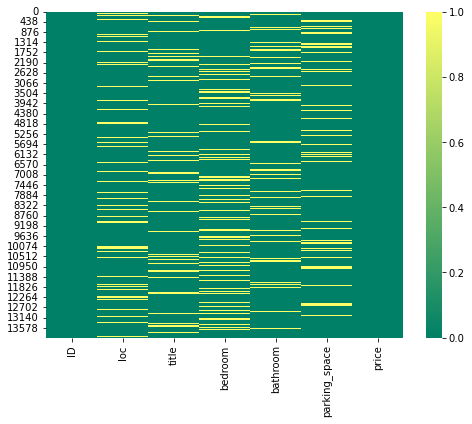

In [69]:
plt.figure(figsize=(8, 6))
sns.heatmap(train.isnull(), cmap='summer')

In [70]:
train['loc'].mode()

0    Kaduna
Name: loc, dtype: object

In [71]:
train['title'] = train['title'].fillna('Unknown')
train['loc'] = train['loc'].fillna('Undisclosed')
train['bedroom'] = train['bedroom'].replace(np.NaN, train['bedroom'].mean())
train['bathroom'] = train['bathroom'].replace(np.NaN, train['bathroom'].mean())
train['parking_space'] = train['parking_space'].replace(np.NaN, train['parking_space'].mean())

<AxesSubplot:>

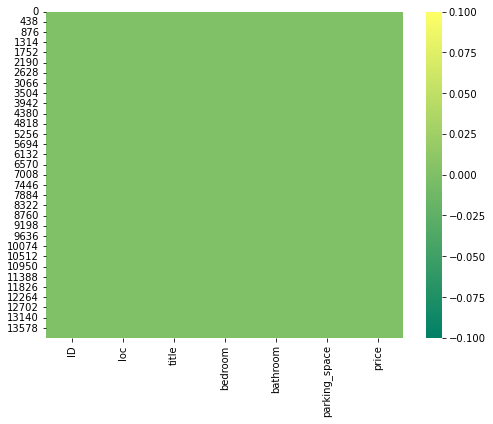

In [72]:
plt.figure(figsize=(8, 6))
sns.heatmap(train.isnull(), cmap='summer')

In [73]:
train.groupby(by=["title"]).mean()

,ID,bedroom,bathroom,parking_space,price
title,,,,,
Apartment,4940.278738,4.338856,3.113066,3.268562,1.567004e+06
Bungalow,5005.518948,4.390330,3.353173,3.189411,1.733845e+06
Cottage,1767.420000,3.120586,1.741313,2.615180,1.307817e+06
Detached duplex,5002.801067,4.325457,3.218521,3.222247,2.205883e+06
Flat,4852.685860,4.369652,3.180691,3.149735,1.721875e+06
Mansion,4882.914523,4.329993,3.188733,3.122729,3.725768e+06
Penthouse,4945.607963,4.338558,3.007118,3.217633,2.628945e+06
Semi-detached duplex,4980.161663,4.397484,3.185916,3.197818,1.918468e+06
Terrace duplex,5152.398894,4.336254,3.271474,3.177161,1.927270e+06


In [74]:
train.groupby(by=["loc"]).mean()

,ID,bedroom,bathroom,parking_space,price
loc,,,,,
Abia,5055.266026,4.152918,3.137327,3.344463,1.717083e+06
Adamawa,4405.217009,4.275051,3.036097,3.100207,1.905287e+06
Akwa Ibom,4781.866261,4.279463,3.096164,3.146357,2.725454e+06
Anambra,4951.118457,4.115355,3.069186,3.264880,2.337230e+06
Bauchi,4831.602339,4.412592,3.330136,3.135884,1.772961e+06
Bayelsa,4946.014706,4.414539,3.218161,3.060712,3.112322e+06
Benue,5062.014085,4.228664,3.248210,3.191551,1.920461e+06
Borno,5075.663818,4.378773,3.131763,3.113908,1.735704e+06
Cross River,4874.942693,4.470202,3.126230,3.126563,2.507765e+06


In [75]:
train.groupby(by=["loc", "title"]).mean()[:40]

ID   bedroom  bathroom  \
loc       title                                                   
Abia      Apartment             5023.633333  4.618029  2.697988   
          Bungalow              5212.827586  3.846236  3.549643   
          Cottage               1960.454545  2.636364  1.660770   
          Detached duplex       4657.608696  4.170631  3.223228   
          Flat                  6071.607143  4.662173  3.350193   
          Mansion               4393.545455  3.916142  3.327437   
          Penthouse             6265.343750  4.497641  3.520974   
          Semi-detached duplex  4035.600000  4.097484  2.893514   
          Terrace duplex        4571.416667  3.580188  2.808446   
          Townhouse             5355.333333  4.273584  3.137212   
          Unknown               5767.083333  4.286338  3.309284   
Adamawa   Apartment             3840.032258  4.210995  2.879628   
          Bungalow              4394.689655  4.535892  2.958807   
          Cottage               1864.533333  2.661634  1.951231   
          Detached duplex       4125.064516  3.749441  3.311973   
          Flat                  4476.250000  4.588521  3.030203   
          Mansion               3788.000000  4.130817  2.784565   
          Penthouse             4612.793103  4.318368  3.200187   
          Semi-detached duplex  4668.608696  5.498494  2.837760   
          Terrace duplex        4562.000000  3.949685  2.979404   
          Townhouse             5839.071429  4.783018  3.028765   
          Unknown               4825.285714  4.141509  3.469080   
Akwa Ibom Apartment             5598.205882  4.278393  2.835374   
          Bungalow              2906.529412  4.018128  2.494277   
          Cottage               1855.166667  2.666667  1.500000   
          Detached duplex       5014.560000  4.384654  3.237586   
          Flat                  5128.625000  4.067413  3.762585   
          Mansion               3925.464286  3.986298  2.421622   
          Penthouse             4949.750000  4.106917  2.879755   
          Semi-detached duplex  4206.054054  4.923168  3.373119   
          Terrace duplex        4897.645161  3.751876  2.888288   
          Townhouse             6366.777778  4.587001  3.570471   
          Unknown               4739.553571  4.582435  3.344080   
Anambra   Apartment             4392.250000  4.426362  2.564039   
          Bungalow              6083.080000  3.581634  3.317586   
          Cottage               2139.800000  2.087211  1.751231   
          Detached duplex       3787.882353  3.918608  2.755035   
          Flat                  5837.178571  4.673180  3.054891   
          Mansion               5369.450000  4.902043  3.651847   
          Penthouse             4971.953488  4.182536  2.921182   

                                parking_space         price  
loc       title                                              
Abia      Apartment                  3.555977  1.307904e+06  
          Bungalow                   3.465844  1.380416e+06  
          Cottage                    2.015439  9.241519e+05  
          Detached duplex            3.297788  1.767214e+06  
          Flat                       3.732481  1.530552e+06  
          Mansion                    2.571186  2.842573e+06  
          Penthouse                  3.745285  2.167290e+06  
          Semi-detached duplex       3.167298  1.461483e+06  
          Terrace duplex             3.264152  1.358023e+06  
          Townhouse                  3.454406  1.677804e+06  
          Unknown                    3.648324  1.744377e+06  
Adamawa   Apartment                  3.194160  1.411304e+06  
          Bungalow                   3.264803  1.508691e+06  
          Cottage                    2.755977  1.105364e+06  
          Detached duplex            3.328670  1.930671e+06  
          Flat                       3.338211  1.625529e+06  
          Mansion                    2.361638  3.077385e+06  
          Penthouse                  2.856866  2

In [76]:
train.corr()

,ID,bedroom,bathroom,parking_space,price
ID,1.000000,0.215356,0.322075,0.154381,0.167093
bedroom,0.215356,1.000000,0.195321,0.095379,0.496913
bathroom,0.322075,0.195321,1.000000,0.153675,0.204804
parking_space,0.154381,0.095379,0.153675,1.000000,0.101578
price,0.167093,0.496913,0.204804,0.101578,1.000000


<AxesSubplot:>

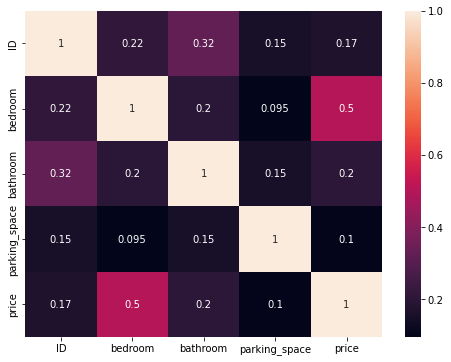

In [77]:
plt.figure(figsize=(8, 6))
sns.heatmap(train.corr(), annot=True)

<AxesSubplot:>

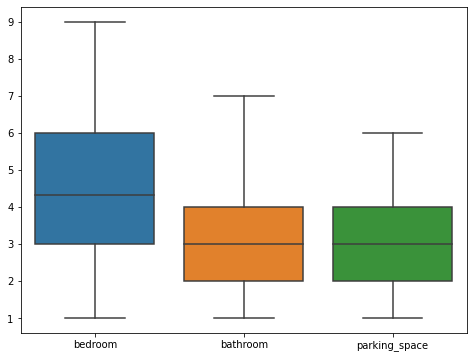

In [78]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=train[["loc", "title", "bedroom", "bathroom", "parking_space"]])

<AxesSubplot:ylabel='Frequency'>

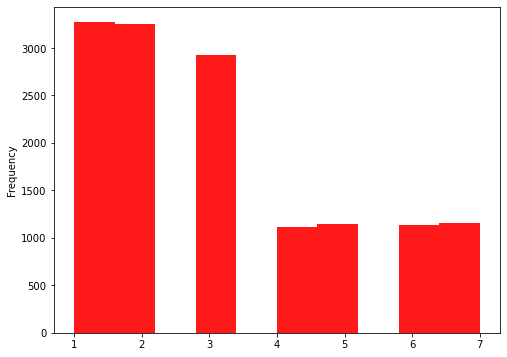

In [79]:
plt.figure(figsize=(8, 6))
train["bathroom"].plot(kind='hist', color='red', alpha=.9)

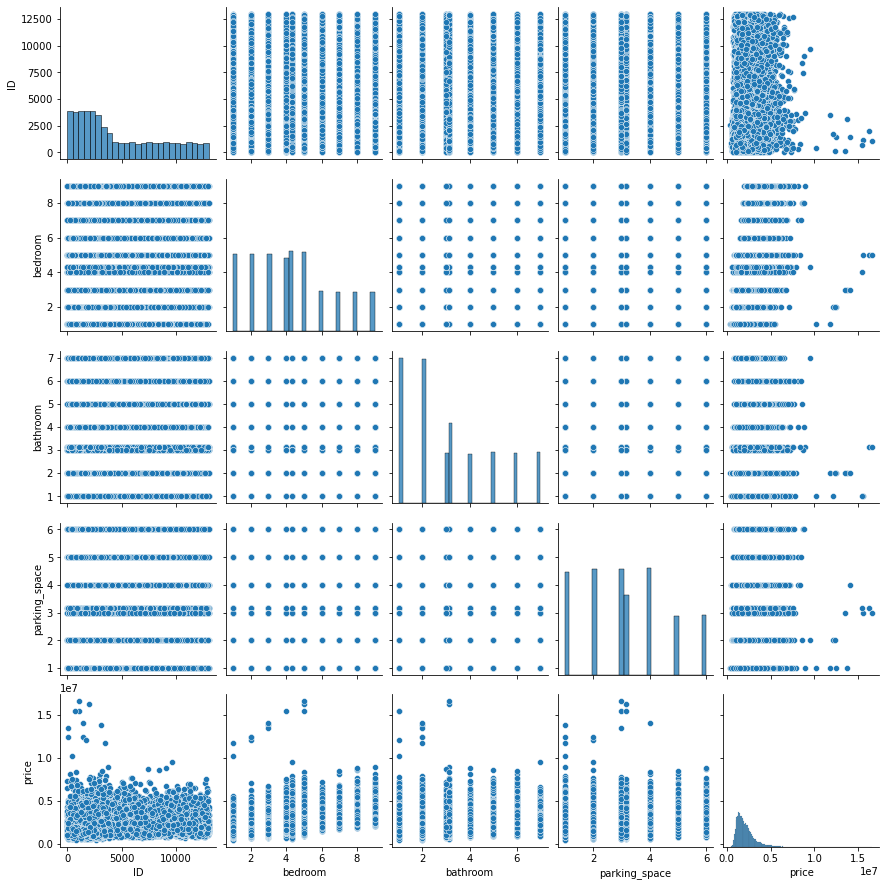

In [80]:
sns.pairplot(train)

<AxesSubplot:xlabel='price', ylabel='Density'>

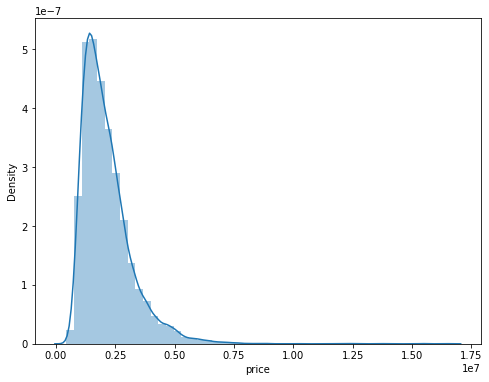

In [81]:
plt.figure(figsize=(8, 6))
sns.distplot(train['price'])

<AxesSubplot:ylabel='Frequency'>

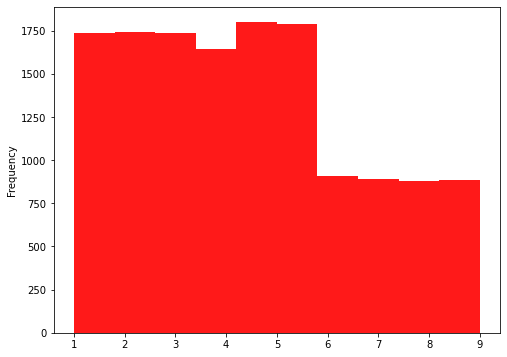

In [82]:
plt.figure(figsize=(8, 6))
train["bedroom"].plot(kind='hist', color='red', alpha=.9)

<AxesSubplot:ylabel='Frequency'>

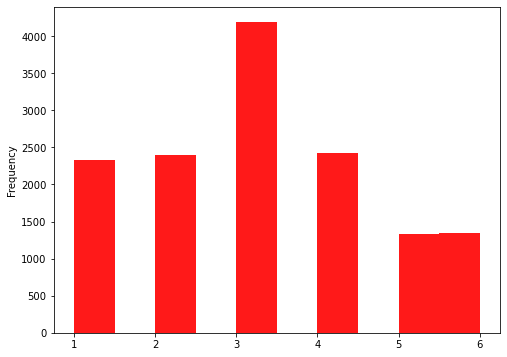

In [83]:
plt.figure(figsize=(8, 6))
train["parking_space"].plot(kind='hist', color='red', alpha=.9)

<AxesSubplot:ylabel='Frequency'>

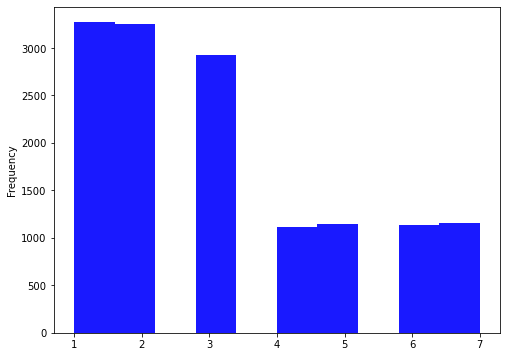

In [84]:
plt.figure(figsize=(8, 6))
train["bathroom"].plot(kind='hist', color='blue', alpha=.9)

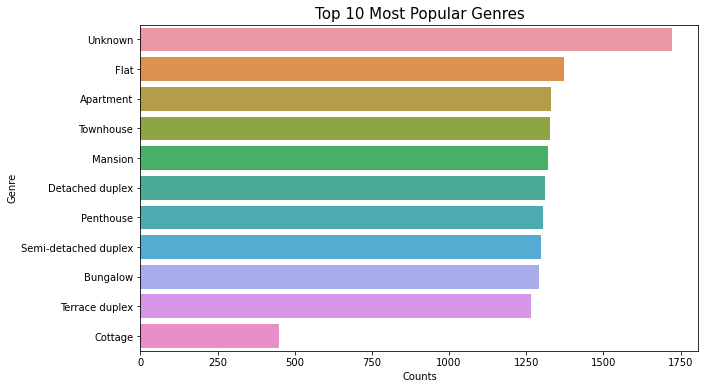

In [85]:
plt.figure(figsize=(10, 6))
sns.countplot(y=train['title'].explode(), order=train['title'].explode().value_counts().index)
plt.ylabel('Genre')
plt.xlabel('Counts')
plt.title('Top 10 Most Popular Genres', fontsize=15)
plt.yticks(rotation=0)
plt.show()

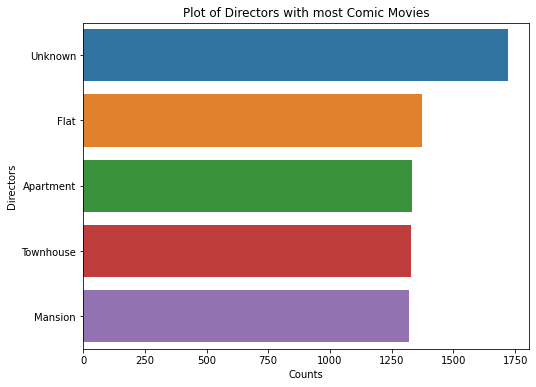

In [86]:
plt.figure(figsize=(8, 6))
#top_movies = train['loc']
sns.countplot(y='title', data=train, order=train['title'].value_counts().head().index)

plt.ylabel('Directors')
plt.xlabel('Counts')
plt.title('Plot of Directors with most Comic Movies')
plt.show()

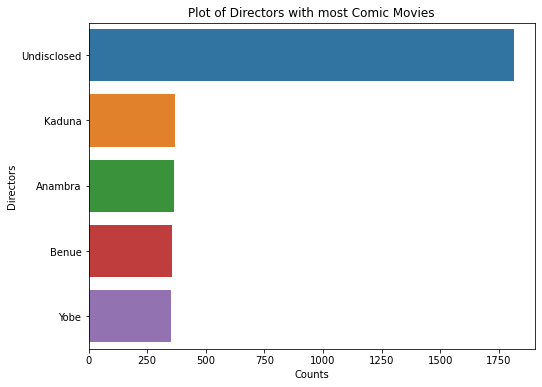

In [87]:
plt.figure(figsize=(8, 6))
#top_movies = train['loc']
sns.countplot(y='loc', data=train, order=train['loc'].value_counts().head().index)

plt.ylabel('Directors')
plt.xlabel('Counts')
plt.title('Plot of Directors with most Comic Movies')
plt.show()

In [88]:
train['loc'].value_counts()

Undisclosed    1813
Kaduna          370
Anambra         363
Benue           355
Yobe            353
Borno           351
Kano            351
Cross River     349
Nasarawa        349
Zamfara         348
Imo             348
Ebonyi          346
Kebbi           346
Katsina         345
Ogun            345
Ondo            344
Gombe           343
Bauchi          342
Oyo             341
Adamawa         341
Bayelsa         340
Plateau         338
Osun            338
Jigawa          337
Ekiti           336
Kwara           333
Niger           330
Akwa Ibom       329
Lagos           328
Sokoto          326
Delta           325
Enugu           324
Rivers          323
Kogi            321
Taraba          315
Abia            312
Edo             302
Name: loc, dtype: int64

<AxesSubplot:ylabel='Frequency'>

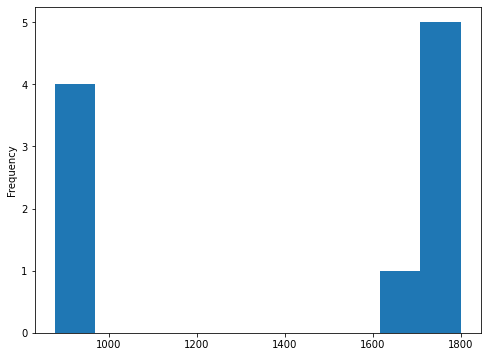

In [89]:
plt.figure(figsize=(8, 6))
train['bedroom'].value_counts().plot(kind='hist')

#### Data Preprocessing...

In [90]:
label = LabelEncoder()

In [91]:
train['loc'] = label.fit_transform(train['loc'])
train['loc']

0        19
1        27
2        12
3         3
4        21
         ..
13995    11
13996    17
13997    30
13998     9
13999    24
Name: loc, Length: 14000, dtype: int32

In [92]:
train['title'] = label.fit_transform(train['title'])
train['title']

0         7
1         0
2        10
3         3
4         8
         ..
13995     1
13996     0
13997     1
13998     4
13999    10
Name: title, Length: 14000, dtype: int32

In [93]:
X = train.drop(['ID', 'price'], axis=1)
X

,loc,title,bedroom,bathroom,parking_space
0,19,7,2.000000,2.0,1.000000
1,27,0,4.308171,2.0,4.000000
2,12,10,7.000000,5.0,3.169825
3,3,3,5.000000,2.0,4.000000
4,21,8,4.308171,5.0,6.000000
...,...,...,...,...,...
13995,11,1,4.308171,7.0,3.169825
13996,17,0,4.308171,7.0,5.000000
13997,30,1,8.000000,6.0,5.000000
13998,9,4,4.308171,6.0,1.000000


In [94]:
y = train['price']
y

0        1149999.565
1        1672416.689
2        3364799.814
3        2410306.756
4        2600700.898
            ...     
13995    2367927.861
13996    2228516.471
13997    2406812.693
13998    3348918.718
13999    2858516.890
Name: price, Length: 14000, dtype: float64

In [95]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-5.94381125e-02,  5.22038265e-01, -1.01287324e+00,
        -5.96934926e-01, -1.45399005e+00],
       [ 6.53615508e-01, -1.65007357e+00, -3.89751007e-16,
        -5.96934926e-01,  5.56296330e-01],
       [-6.83360031e-01,  1.45294334e+00,  1.18122988e+00,
         9.81930334e-01,  2.97582163e-16],
       ...,
       [ 9.21010616e-01, -1.33977188e+00,  1.62005050e+00,
         1.50821875e+00,  1.22639179e+00],
       [-9.50755138e-01, -4.08866806e-01, -3.89751007e-16,
         1.50821875e+00, -1.45399005e+00],
       [ 3.86220400e-01,  1.45294334e+00,  2.05887112e+00,
         2.03450717e+00,  1.22639179e+00]])

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=11)

In [97]:
linear = LinearRegression()

In [98]:
linear.fit(X_train, y_train)

LinearRegression()

In [99]:
def rmse(model):
    pred = model.predict(X_test)
    rmse = np.sqrt(metrics.mean_squared_error(pred, y_test))

    return rmse



In [100]:
from sklearn.ensemble import  RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100, n_jobs=10, random_state=11)
forest.fit(X_train, y_train)

RandomForestRegressor(n_jobs=10, random_state=11)

In [101]:
from sklearn.ensemble import  ExtraTreesRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor


boost = AdaBoostRegressor()
gradient = GradientBoostingRegressor()
xgb = XGBRegressor(random_state=11, n_estimators=100, max_leaves=0, n_jobs=10)


boost.fit(X_train, y_train)
gradient.fit(X_train, y_train)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=0,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=10, num_parallel_tree=None,
             predictor=None, random_state=11, ...)

In [102]:
param_grid = {'n_estimators' : [1, 5, 10, 15],
'n_jobs' : [0, 5, 10, 15],
'max_leaves' : [0, 1, 4, 7, 9]
}
gcv = GridSearchCV(xgb , param_grid=param_grid, cv=5)
gcv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=0,
                                    min_child_weight=None, missing=nan,
    

In [103]:
xgb = XGBRegressor(random_state=11, n_estimators=100, n_jobs=0, max_leaves=0, gamma=50)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=50, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=0,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=None, predictor=None,
             random_state=11, ...)

In [104]:
bag = BaggingRegressor(n_estimators=100, n_jobs=10, base_estimator=xgb)
bag.fit(X_train, y_train)

BaggingRegressor(base_estimator=XGBRegressor(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=50,
                                             gpu_id=None, grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             learning_rate=None, max_bin=None,
                                             max_cat_threshold=None,
          

In [105]:
rmse(xgb)

576932.2387991401

In [106]:
rmse(gradient)

645119.9723128966

In [107]:
rmse(bag)

572640.7695302563

#### Replicating preprocessing on test data

In [108]:
test['loc'] = label.fit_transform(test['loc'])
test['title'] = label.fit_transform(test['title'])

test = test.drop(['ID'], axis=1)

test = scaler.fit_transform(test)

In [109]:
prediction = bag.predict(test)
prediction

array([1101316.6, 1498190.8, 1859162.8, ..., 1355708.8, 4743075. ,
       2507091.2], dtype=float32)

In [110]:
submit = pd.DataFrame({'ID': submission['ID'], 'price': prediction})
submit

,ID,price
0,845,1101316.625
1,1924,1498190.750
2,10718,1859162.750
3,12076,4312253.000
4,12254,1683597.250
...,...,...
5995,1594,3324258.500
5996,2416,2902916.250
5997,10195,1355708.750
5998,9455,4743075.000


In [111]:
submit.to_csv("hack_submission", index=0)

In [112]:
"""train["region"] = {
                    'South West': ['Lagos', 'Ogun', 'Ondo', 'Osun,' 'Oyo', 'Ekiti'],
                    'South South': ['Bayelsa', 'Cross River', 'Rivers', 'Akwa Ibom', 'Delta', 'Edo'],
                    'South East': ['Abia', 'Anambra', 'Imo', 'Ebonyi', 'Enugu'],
                    'North Central': ['Kogi', 'Kwara', 'Nasarawa', 'Niger', 'Benue', 'Plateau'],
                    'North West': ['Kaduna', 'Kano', 'Kebbi', 'Sokoto', 'Zamfara', 'Katsina', 'Jigawa'],
                    'North East': ['Yobe', 'Borno', 'Adamawa', 'Taraba', 'Bauchi', 'Gombe']
                  }
"""

'train["region"] = {\n                    \'South West\': [\'Lagos\', \'Ogun\', \'Ondo\', \'Osun,\' \'Oyo\', \'Ekiti\'],\n                    \'South South\': [\'Bayelsa\', \'Cross River\', \'Rivers\', \'Akwa Ibom\', \'Delta\', \'Edo\'],\n                    \'South East\': [\'Abia\', \'Anambra\', \'Imo\', \'Ebonyi\', \'Enugu\'],\n                    \'North Central\': [\'Kogi\', \'Kwara\', \'Nasarawa\', \'Niger\', \'Benue\', \'Plateau\'],\n                    \'North West\': [\'Kaduna\', \'Kano\', \'Kebbi\', \'Sokoto\', \'Zamfara\', \'Katsina\', \'Jigawa\'],\n                    \'North East\': [\'Yobe\', \'Borno\', \'Adamawa\', \'Taraba\', \'Bauchi\', \'Gombe\']\n                  }\n'

In [127]:
South_West = ['Lagos', 'Ogun', 'Ondo', 'Osun,' 'Oyo', 'Ekiti'],
South_South = ['Bayelsa', 'Cross River', 'Rivers', 'Akwa Ibom', 'Delta', 'Edo'],
South_East = ['Abia', 'Anambra', 'Imo', 'Ebonyi', 'Enugu'],
North_Central = ['Kogi', 'Kwara', 'Nasarawa', 'Niger', 'Benue', 'Plateau'],
North_West = ['Kaduna', 'Kano', 'Kebbi', 'Sokoto', 'Zamfara', 'Katsina', 'Jigawa'],
North_East =['Yobe', 'Borno', 'Adamawa', 'Taraba', 'Bauchi', 'Gombe']

In [124]:
#plt.train[['bedroom', 'bathroom', 'parking_space']].plot(kind='hist')
#plt.plot(train[['South_West', 'South_South', 'South_East', 'North_Central', 'North_West', 'North_East']], kind='hist')